Data Preparation and Cleaning

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Matches data
#loading data from csv file
matchesdf = pd.read_csv('matches.csv')
deliveriesdf = pd.read_csv('deliveries.csv')

In [4]:
#shape and columns in the dataframe
print(matchesdf.shape)
print(matchesdf.columns)
print(deliveriesdf.columns)

(756, 18)
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [5]:
#let’s perform a simple summary statistics using the method describe().
matchesdf.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
#basic information retrieval is to see a couple of actual rows of the input dataset.
matchesdf.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
#Data cleaning
matchesdf.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [8]:
#sum of missing values in each column
matchesdf.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
#Deliveries data
print(deliveriesdf.shape)
print(deliveriesdf.columns)

(179078, 21)
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [10]:
deliveriesdf.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


This data consists a very low data of each ball bowled during the game and who bowled and played the ball and what happened during each ball. Let us look at the missing values in this dataframe.

In [11]:
deliveriesdf.isnull().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
dtype: bool

In [12]:
#sum of missing values in each column
deliveriesdf.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

By assessing the data, the data does not have much cleaning issues. The deliveries data is very granular and  it is good to merge the required columns like season from matches dataframe to deliveries dataframe. This will make aggregation steps easier. Also, we will rename the team names with abbreviations for more readability on.

In [13]:
#dropping three empty columns
deliveriesdf.drop(['player_dismissed', 'dismissal_kind', 'fielder'],axis=1, inplace=True)

In [14]:
#merge season value from the matches dataframe to deliveries
merge_df = matchesdf[['id','season']].merge(deliveriesdf, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [15]:
#replace team names with abbreviations for more readability in plots and tables
merge_df.replace(['Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['DD','GL','KXIP','SRH','RPS','MI','KKR','RCB','DC','CSK','RR','KTK','PW','RPS'],inplace=True)

In [16]:
merge_df.head(5)

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


Exploratory Analysis and Visualization

In [17]:
# we will value_counts() for determining how many matches wins by each team
matchesdf['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

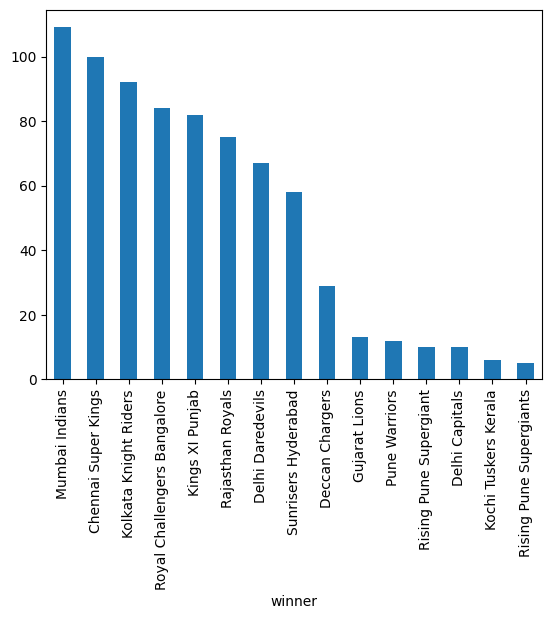

In [18]:
winner_2008_2017=matchesdf['winner'].value_counts().plot(kind='bar')

In [19]:
matchesdf.drop_duplicates(subset=['season','city'])
matchesdf.drop_duplicates('season',keep='last')[['season','winner']]
finals = matchesdf.drop_duplicates('season',keep='last')[['season','winner']].sort_values('season')
print(finals)

     season                 winner
116    2008       Rajasthan Royals
173    2009        Deccan Chargers
233    2010    Chennai Super Kings
306    2011    Chennai Super Kings
380    2012  Kolkata Knight Riders
456    2013         Mumbai Indians
516    2014  Kolkata Knight Riders
575    2015         Mumbai Indians
635    2016    Sunrisers Hyderabad
58     2017         Mumbai Indians
695    2018    Chennai Super Kings
755    2019         Mumbai Indians


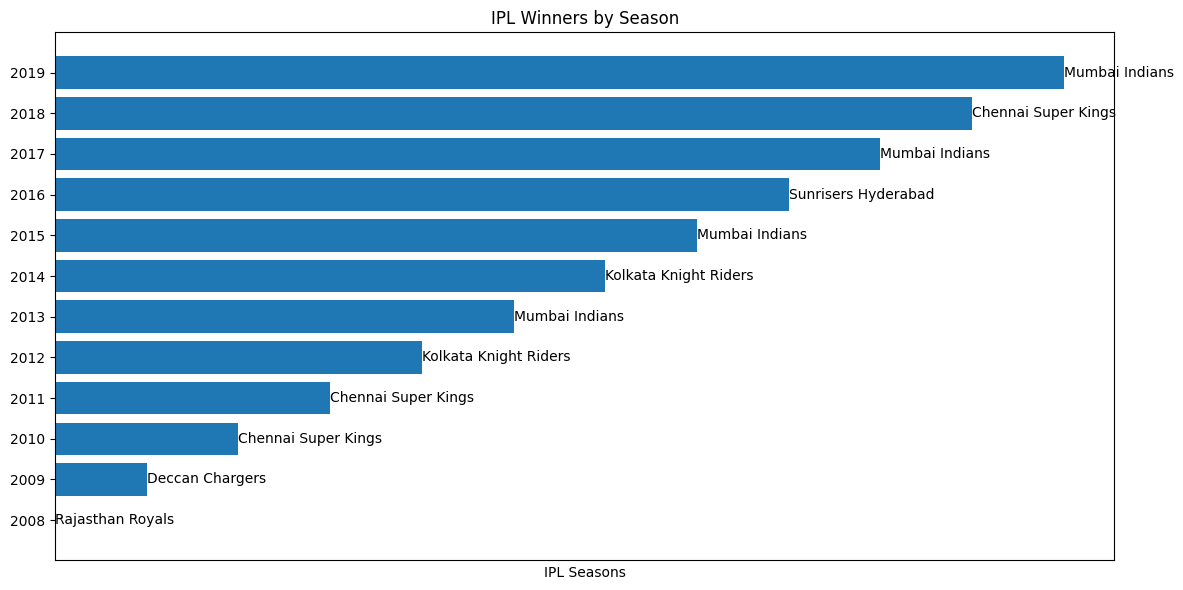

In [20]:
# Create the bar graph
plt.figure(figsize=(12, 6))
bars = plt.barh(finals['season'], range(len(finals)), align='center')
plt.yticks(finals['season'], finals['season'])
plt.xlabel('IPL Seasons')
plt.title('IPL Winners by Season')

# Add winner names to the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             finals['winner'].iloc[i], 
             ha='left', va='center')

# Remove x-axis ticks
plt.xticks([])

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

Que- find out top 5 batsman with highest runs 

In [21]:
runs=deliveriesdf.groupby('batsman')

In [22]:
runs['batsman_runs'].sum().sort_values(ascending=False).head(5)

batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

In [23]:
# Merge 
new=deliveriesdf.merge(matchesdf,left_on='match_id',right_on='id')
new

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [24]:
ORANGE CAP HOLDERS OF EACH SEASONS

SyntaxError: invalid syntax (3458574181.py, line 1)

In [24]:
new.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset='season',keep='first').sort_values('season')

,season,batsman,batsman_runs
10,2008,SE Marsh,616
14,2009,ML Hayden,572
9,2010,SR Tendulkar,618
11,2011,CH Gayle,608
3,2012,CH Gayle,733
2,2013,MEK Hussey,733
6,2014,RV Uthappa,660
17,2015,DA Warner,562
0,2016,V Kohli,973
7,2017,DA Warner,641


Find Out Which team hit how many sixes in each overs?

In [25]:
mask=deliveriesdf['batsman_runs']==6
six=deliveriesdf[mask]
six.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,6,0,6
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,0,0,0,0,0,6,0,6
75,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,0,0,0,0,0,6,0,6
89,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,0,0,0,0,0,6,0,6
91,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,0,0,0,0,0,6,0,6


In [26]:
pt=six.pivot_table(index="over",columns='batting_team',values='batsman_runs',aggfunc='count')
pt

batting_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,,,
1,5.0,3.0,14.0,4.0,10.0,2.0,10.0,9.0,5.0,12.0,1.0,NaN,20.0,3.0
2,17.0,21.0,19.0,6.0,19.0,4.0,13.0,17.0,6.0,7.0,NaN,2.0,28.0,12.0
3,37.0,11.0,30.0,14.0,27.0,3.0,28.0,22.0,6.0,13.0,2.0,1.0,40.0,16.0
4,34.0,17.0,41.0,9.0,36.0,3.0,35.0,28.0,7.0,21.0,5.0,1.0,43.0,8.0
5,41.0,27.0,29.0,11.0,30.0,3.0,25.0,43.0,7.0,23.0,8.0,5.0,40.0,17.0
6,43.0,22.0,27.0,12.0,39.0,3.0,34.0,50.0,3.0,24.0,6.0,5.0,29.0,10.0
7,22.0,11.0,20.0,10.0,19.0,2.0,26.0,18.0,5.0,15.0,1.0,4.0,18.0,13.0
8,25.0,13.0,26.0,6.0,35.0,2.0,25.0,23.0,10.0,24.0,NaN,3.0,34.0,19.0
9,23.0,17.0,32.0,11.0,36.0,1.0,27.0,35.0,9.0,20.0,3.0,1.0,47.0,15.0


<Axes: xlabel='batting_team', ylabel='over'>

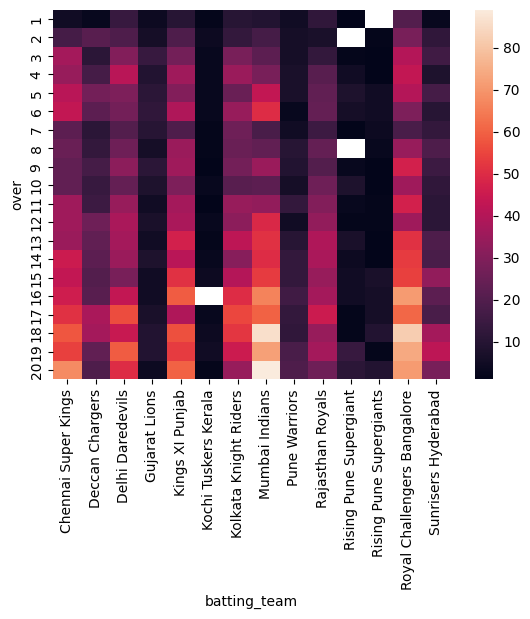

In [27]:
sns.heatmap(pt)

Which batsman scored most 1’s, 2’s, 3’s, 4’s runs?

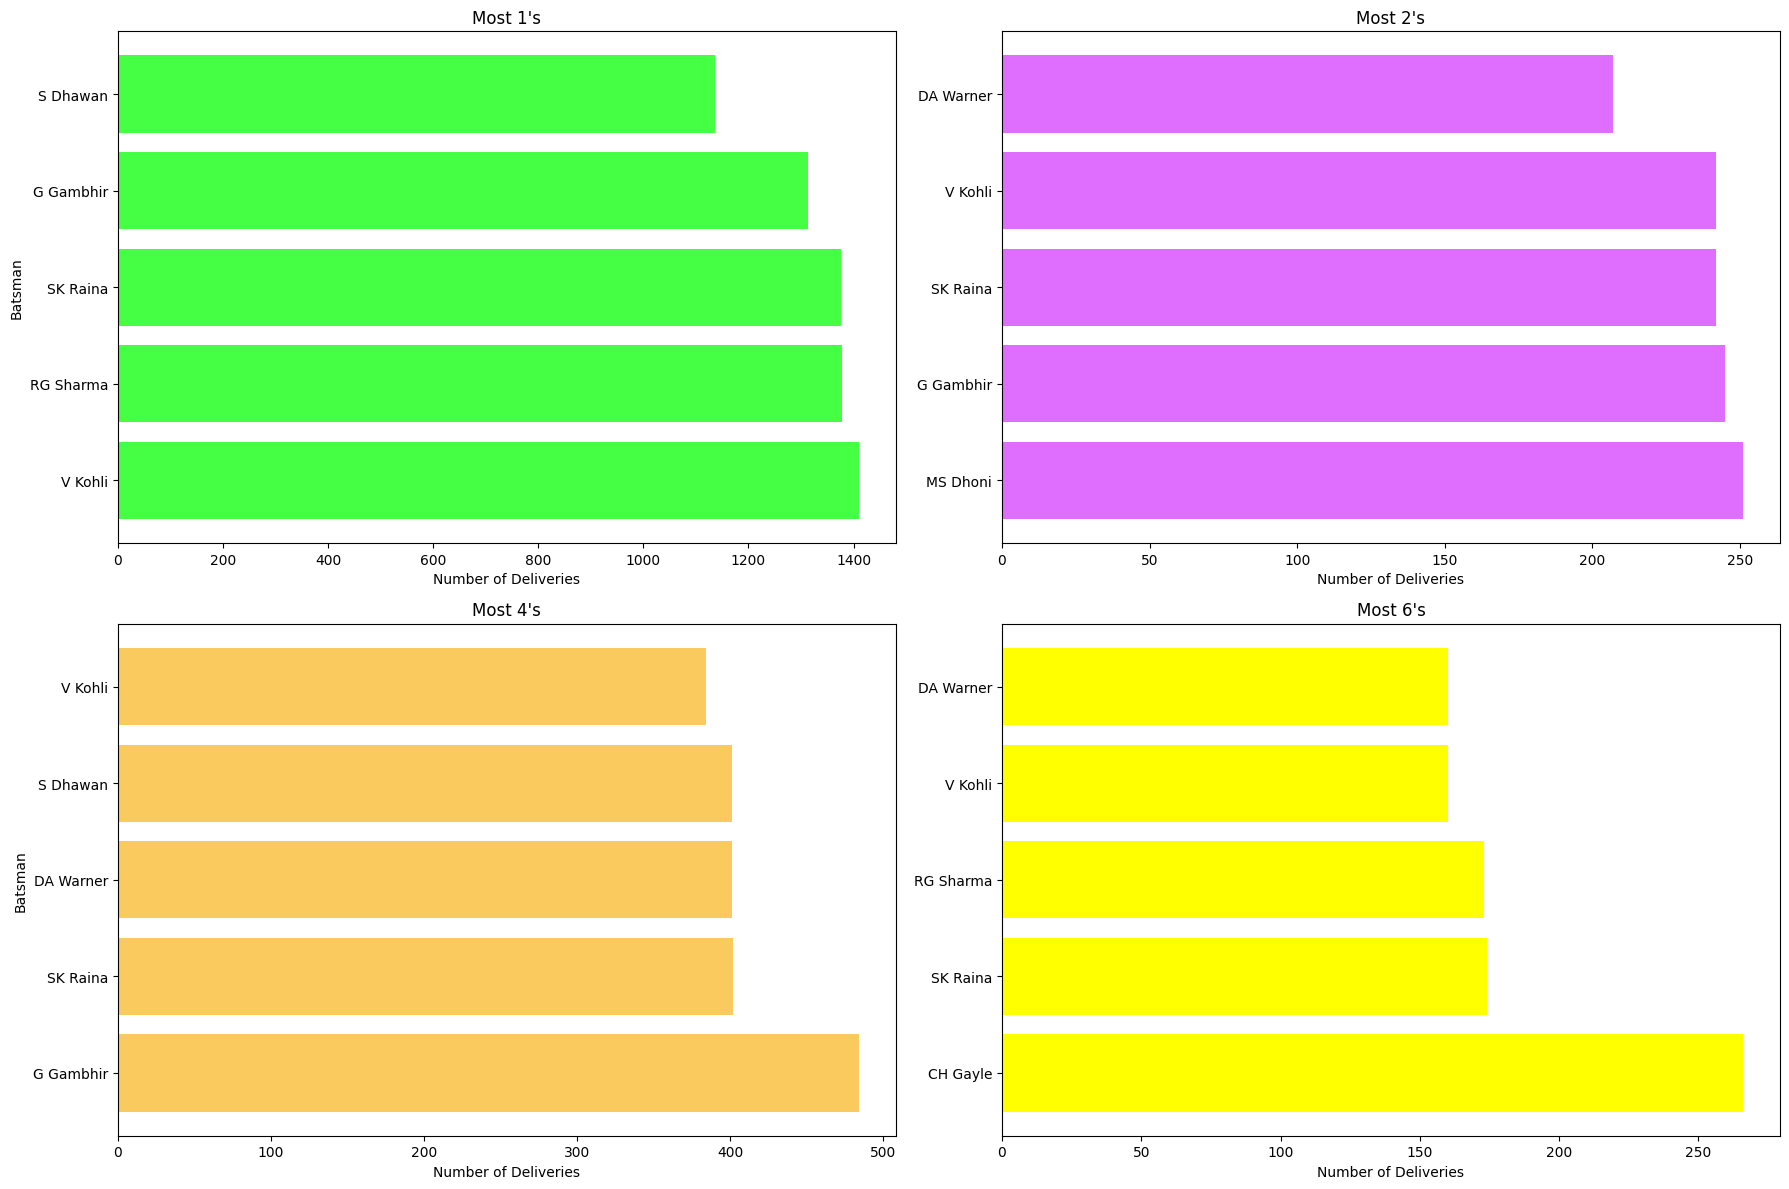

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping the data by batsman and batsman_runs, counting total_runs
toppers = deliveriesdf.groupby(['batsman', 'batsman_runs'])['total_runs'].count().reset_index()

# Pivoting the data to create a table with batsmen as rows and runs (1, 2, 4, 6) as columns
toppers = toppers.pivot(index='batsman', columns='batsman_runs', values='total_runs')

# Creating subplots (2x2 grid)
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Plotting for most 1's
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh', ax=ax[0,0], color='#45ff45', width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_xlabel('Number of Deliveries')  # Adding xlabel for clarity
ax[0,0].set_ylabel('Batsman')

# Plotting for most 2's
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh', ax=ax[0,1], color='#df6dfd', width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_xlabel('Number of Deliveries')
ax[0,1].set_ylabel('')

# Plotting for most 4's
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh', ax=ax[1,0], color='#fbca5f', width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_xlabel('Number of Deliveries')
ax[1,0].set_ylabel('Batsman')

# Plotting for most 6's
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh', ax=ax[1,1], color='#ffff00', width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_xlabel('Number of Deliveries')
ax[1,1].set_ylabel('')

# Adjusting layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()


 Who won maximum Man Of Matches?

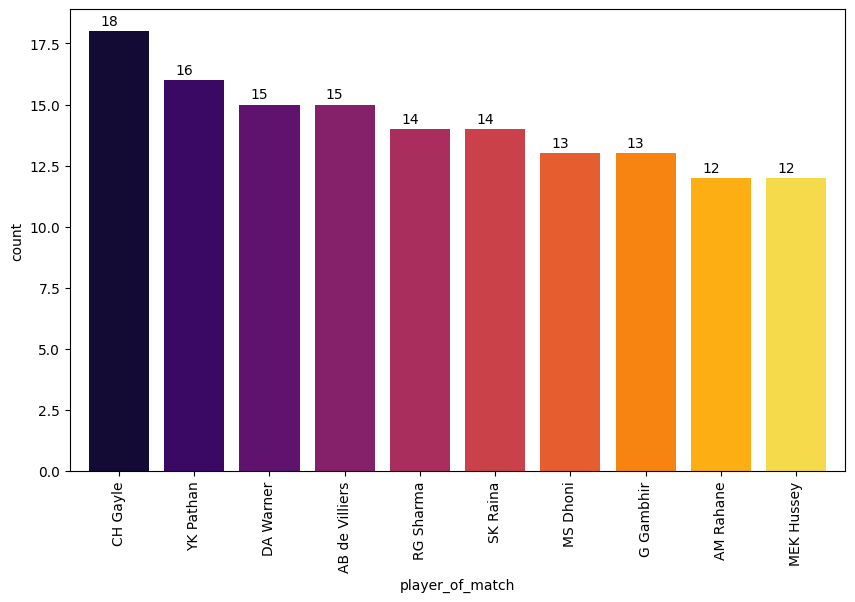

In [31]:
plt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matchesdf['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

Toss winners in percentage of success

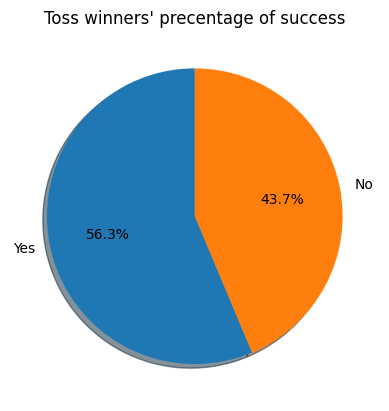

In [32]:
#obtain toss winners in the match
winner = matchesdf[matchesdf['toss_winner']==matchesdf['winner']]
labels=['Yes','No']
#pie plot
plt.pie([len(winner),(577-len(winner))],labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plot = plt.gcf()
plt.title("Toss winners' precentage of success")
plt.show()

How many  Runs scored Across the Seasons?

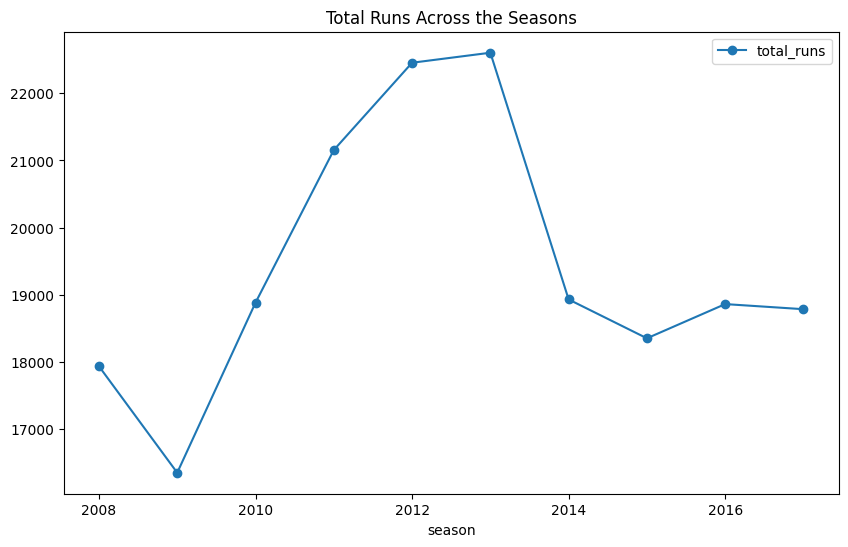

In [43]:
batsmen = matchesdf[['id','season']].merge(deliveriesdf, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

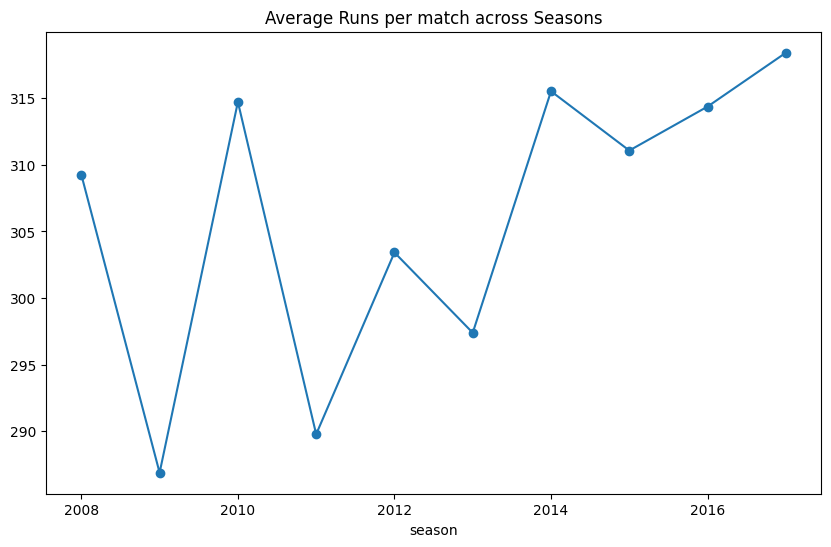

In [44]:
avgruns_each_season=matchesdf.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match across Seasons')
plt.show()

Which bowlers can thrive well in powerplays?

In [45]:
#slice data for first 6 overs
powerplay_deliveries = merge_df[merge_df['over'] <=6].reset_index()
bowlers = powerplay_deliveries.groupby(["bowler", "over", "match_id", "season"]).sum().reset_index()
bowlers["total_overs"] = 1
bowlers = bowlers[["bowler", "total_overs", "total_runs", "season"]]
bowlers = bowlers.groupby(["bowler","season"]).sum().reset_index()
#new column showing the economy rate of the bowler
bowlers["economy_rate"] = bowlers.apply(lambda row: "{:.2f}".format(row["total_runs"] / row["total_overs"]), axis=1)
bowlers.head()

,bowler,season,total_overs,total_runs,economy_rate
0,A Ashish Reddy,2012,1,20,20.00
1,A Chandila,2012,7,41,5.86
2,A Chandila,2013,17,98,5.76
3,A Choudhary,2017,6,46,7.67
4,A Flintoff,2009,2,21,10.50


In [46]:
# all time best economic bowlers during powerplay
bowlers.nlargest(10, 'total_overs').sort_values(by=["economy_rate"], ascending=[True])

,bowler,season,total_overs,total_runs,economy_rate
539,P Kumar,2013,37,214,5.78
251,GD McGrath,2008,37,218,5.89
127,B Kumar,2016,36,218,6.06
471,MG Johnson,2013,39,243,6.23
488,MM Sharma,2013,36,230,6.39
538,P Kumar,2012,43,278,6.47
542,P Kumar,2016,38,253,6.66
24,A Nehra,2015,42,297,7.07
286,I Sharma,2013,38,278,7.32
501,MS Gony,2008,45,342,7.60
